In [10]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image


In [4]:
input_path = Path("../input/")
train_imgs_path = input_path / "train_images"

In [5]:
train = pd.read_csv(input_path / "train.csv")
uc_trans = pd.read_csv(input_path / "unicode_translation.csv")

train = train.dropna()
train = train.reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 2 columns):
image_id    3605 non-null object
labels      3605 non-null object
dtypes: object(2)
memory usage: 56.5+ KB


In [6]:
train_chars = {}
train_chars_num = 0
for i in tqdm(range(train.shape[0])):
    image_id = train.iloc[i]["image_id"]
    labels = train.iloc[i]["labels"].split(" ")
    values = {"Unicode" : [],
              "X" : [],
              "Y" : [],
              "Width" : [],
              "Height" : []}
    for j in range(0, len(labels), 5):
        uc = labels[j]
        x = int(labels[j+1])
        y = int(labels[j+2])
        w = int(labels[j+3])
        h = int(labels[j+4])
        values["Unicode"].append(uc)
        values["X"].append(x)
        values["Y"].append(y)
        values["Width"].append(w)
        values["Height"].append(h)
        train_chars_num += 1
    train_chars[image_id] = values
train_chars_num

683464

Unicode:U+306F,X:1231,Y:3465,Width:133,Height:53
Unicode:U+304C,X:275,Y:1652,Width:84,Height:69
Unicode:U+3044,X:1495,Y:1218,Width:143,Height:69
Unicode:U+3051,X:220,Y:3331,Width:53,Height:91
Unicode:U+306B,X:911,Y:1452,Width:61,Height:92
Unicode:U+306B,X:927,Y:3445,Width:71,Height:92


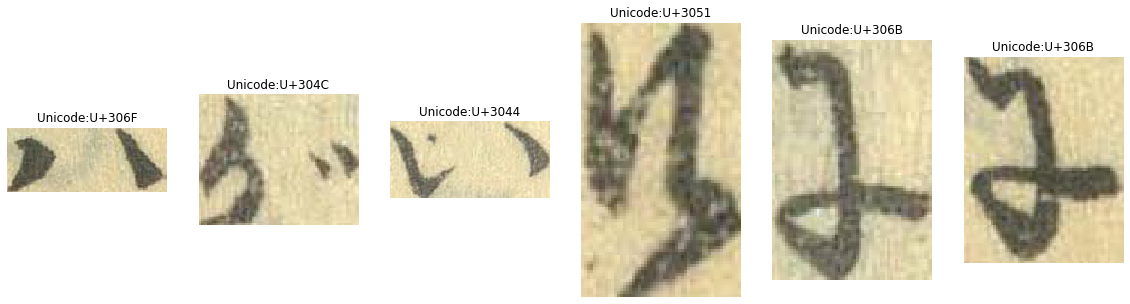

In [11]:
fig = plt.figure(figsize=(20, 80))
image_id_1st = train.iloc[0]["image_id"]
img_1st = Image.open(train_imgs_path/(image_id_1st+".jpg"))
for i in range(6):
    uc = train_chars[image_id_1st]["Unicode"][i]
    x = train_chars[image_id_1st]["X"][i]
    y = train_chars[image_id_1st]["Y"][i]
    w = train_chars[image_id_1st]["Width"][i]
    h = train_chars[image_id_1st]["Height"][i]
    img = img_1st.crop((x, y, x+w, y+h))
    args = (uc, x, y, w, h)
    print("Unicode:%s,X:%d,Y:%d,Width:%d,Height:%d" % args)
    fig.add_subplot(1, 6, i+1, title="Unicode:%s" % uc)
    plt.axis("off")
    plt.imshow(np.asarray(img))
plt.show()

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [2]:
pred_center_result = pd.read_csv("../cache/train_result.csv")
pred_box_result = pd.read_csv("../cache/train_true_result.csv")
train_df = pd.read_csv("../input/train.csv")

In [10]:
count = 0
for i in tqdm(range(train_df.shape[0])):
    image_id = train_df.loc[i, "image_id"]
    train_labels = train_df.loc[i, "labels"]
    pred_centers = pred_center_result.loc[i, "labels"]
    pred_boxes = pred_box_result.loc[i, "labels"]
    if type(train_labels) is str and type(pred_centers) is str and type(pred_boxes) is str:
        train_labels = np.array(train_labels.split(" ")).reshape(-1, 5)
        pred_centers = np.array(pred_centers.split(" ")).reshape(-1, 3)
        pred_boxes = np.array(pred_boxes.split(" ")).reshape(-1, 5)
        
        if train_labels.shape[0] != pred_boxes.shape[0]:
            count += 1
print(count)
print(train_df.shape[0])


3284
3881
